In [1]:
#시각화를 위해 import pandas
import pandas as pd
#붓꽃 데이터 로드
from sklearn.datasets import load_iris
#train_test_split으로 데이터 나누기
from sklearn.model_selection import train_test_split
#가우시안 나이브 베이즈로 iris데이터 분류
from sklearn.naive_bayes import GaussianNB
#분류 성능을 측정하기 위해 metrics와 accuracy_scrore 임포트
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [4]:
#<데이터 획득>
#iris 데이터 불러오기
dataset = load_iris()

#pandas의 데이터프레임으로 데이터 저장
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

#레이블(타깃)을 데이터프레임에 저장
df['target'] = dataset.target

#숫자 형태의 레이블을 이해를 돕기 위해 문자로 변경
df.target = df.target.map({0:"setosa", 1:"versicolor", 2:"virginica"})

#데이터 확인
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

In [5]:
#<데이터 시각화>
setosa_df = df[df.target == "setosa"]
versicolor_df = df[df.target == "versicolor"]
virginica_df = df[df.target == "virginica"]

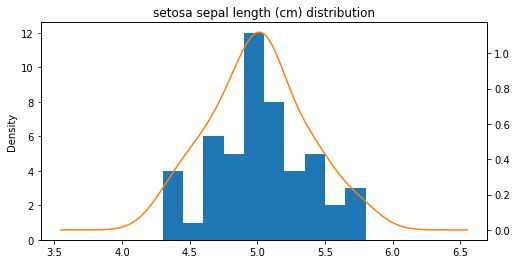

In [7]:
#setosa의 꽃받침 길이에 따른 분포도
ax = setosa_df['sepal length (cm)'].plot(kind='hist')
setosa_df['sepal length (cm)'].plot(kind='kde', ax=ax, secondary_y=True,
                                                        title="setosa sepal length (cm) distribution",
                                                        figsize = (8,4))

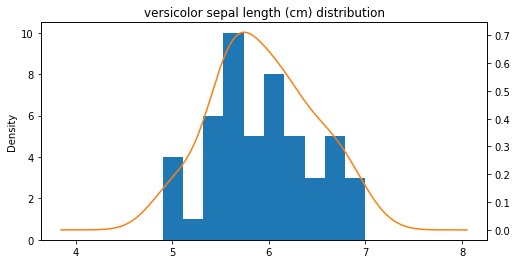

In [9]:
#versicolor의 꽃받침 길이에 따른 분포도
ax = versicolor_df['sepal length (cm)'].plot(kind='hist')
versicolor_df['sepal length (cm)'].plot(kind='kde', ax=ax, secondary_y=True,
                                                        title="versicolor sepal length (cm) distribution",
                                                        figsize = (8,4))

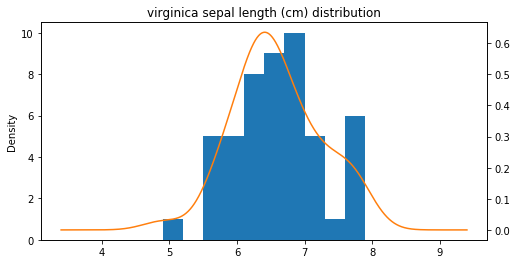

In [10]:
#virginica의 꽃받침 길이에 따른 분포도
ax = virginica_df['sepal length (cm)'].plot(kind='hist')
virginica_df['sepal length (cm)'].plot(kind='kde', ax=ax, secondary_y=True,
                                                        title="virginica sepal length (cm) distribution",
                                                        figsize = (8,4))

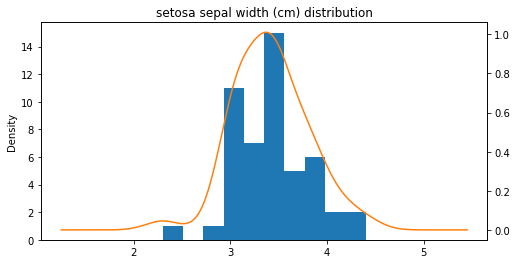

In [11]:
#setosa의 꽃받침 너비에 따른 분포도
ax = setosa_df['sepal width (cm)'].plot(kind='hist')
setosa_df['sepal width (cm)'].plot(kind='kde', ax=ax, secondary_y=True,
                                                        title="setosa sepal width (cm) distribution",
                                                        figsize = (8,4))

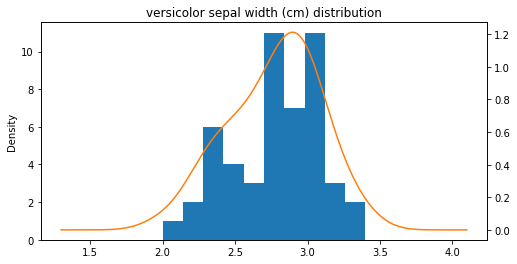

In [12]:
#versicolor의 너비에 따른 분포도
ax = versicolor_df['sepal width (cm)'].plot(kind='hist')
versicolor_df['sepal width (cm)'].plot(kind='kde', ax=ax, secondary_y=True,
                                                        title="versicolor sepal width (cm) distribution",
                                                        figsize = (8,4))

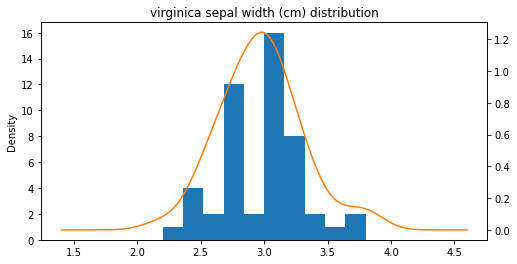

In [13]:
#virginica의 꽃받침 너비에 따른 분포도
ax = virginica_df['sepal width (cm)'].plot(kind='hist')
virginica_df['sepal width (cm)'].plot(kind='kde', ax=ax, secondary_y=True,
                                                        title="virginica sepal width (cm) distribution",
                                                        figsize = (8,4))

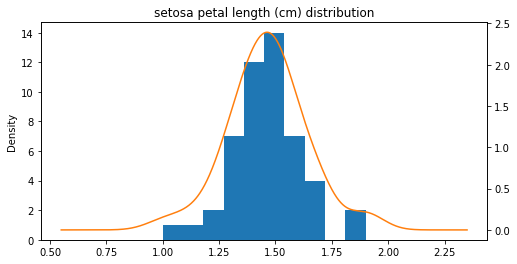

In [14]:
#setosa의 꽃잎 길이에 따른 분포도
ax = setosa_df['petal length (cm)'].plot(kind='hist')
setosa_df['petal length (cm)'].plot(kind='kde', ax=ax, secondary_y=True,
                                                        title="setosa petal length (cm) distribution",
                                                        figsize = (8,4))

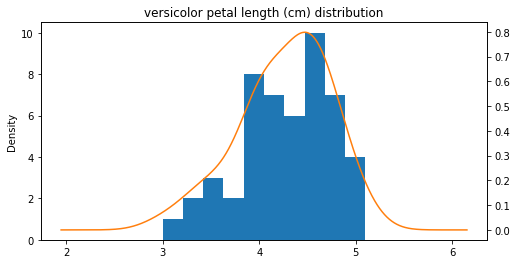

In [15]:
#versicolor의 꽃잎 길이에 따른 분포도
ax = versicolor_df['petal length (cm)'].plot(kind='hist')
versicolor_df['petal length (cm)'].plot(kind='kde', ax=ax, secondary_y=True,
                                                        title="versicolor petal length (cm) distribution",
                                                        figsize = (8,4))

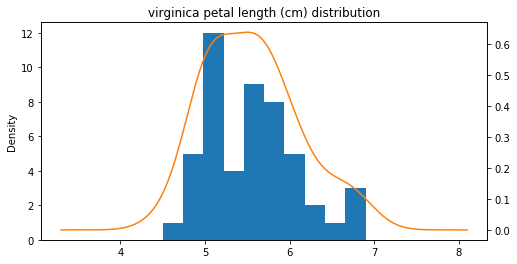

In [16]:
#virginica의 꽃잎 길이에 따른 분포도
ax = virginica_df['petal length (cm)'].plot(kind='hist')
virginica_df['petal length (cm)'].plot(kind='kde', ax=ax, secondary_y=True,
                                                        title="virginica petal length (cm) distribution",
                                                        figsize = (8,4))

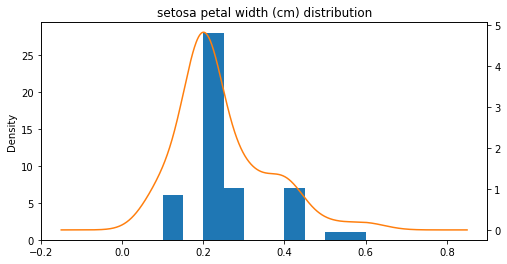

In [17]:
#setosa의 꽃잎 너비에 따른 분포도
ax = setosa_df['petal width (cm)'].plot(kind='hist')
setosa_df['petal width (cm)'].plot(kind='kde', ax=ax, secondary_y=True,
                                                        title="setosa petal width (cm) distribution",
                                                        figsize = (8,4))

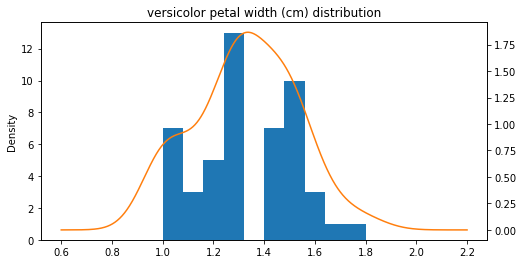

In [18]:
#versicolor의 꽃잎 너비에 따른 분포도
ax = versicolor_df['petal width (cm)'].plot(kind='hist')
versicolor_df['petal width (cm)'].plot(kind='kde', ax=ax, secondary_y=True,
                                                        title="versicolor petal width (cm) distribution",
                                                        figsize = (8,4))

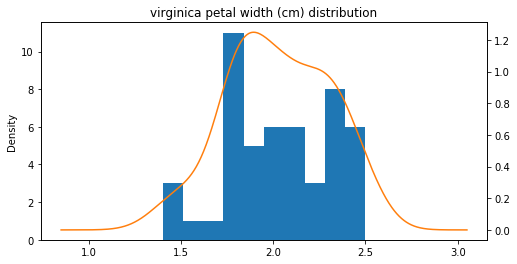

In [19]:
#virginica의 꽃잎 너비에 따른 분포도
ax = virginica_df['petal width (cm)'].plot(kind='hist')
virginica_df['petal width (cm)'].plot(kind='kde', ax=ax, secondary_y=True,
                                                        title="virginica petal width (cm) distribution",
                                                        figsize = (8,4))

In [20]:
#<데이터 다듬기>
#전체 데이터의 20%는 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)

In [21]:
#<모델 학습>
model =GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None)

In [22]:
#<테스트>
expected = y_test
predicted = model.predict(X_test)
print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       0.92      1.00      0.96        11
          2       1.00      0.90      0.95        10

avg / total       0.97      0.97      0.97        30



In [23]:
#정확도 확인
accuracy_score(y_test, predicted)

0.9666666666666667